# 線形回帰

## 正規方程式

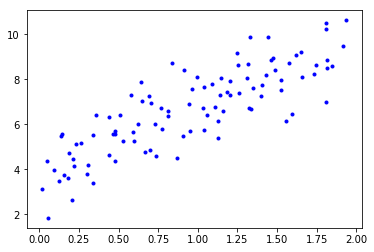

In [34]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.show()

In [35]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.91922413],
       [2.90134597]])

In [36]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.91922413],
       [9.72191606]])

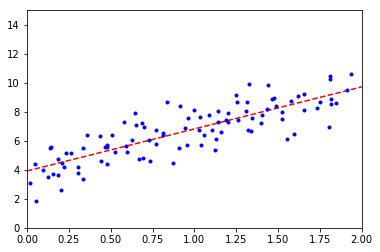

In [37]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91922413]), array([[2.90134597]]))

In [39]:
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[3.91922413],
       [9.72191606]])

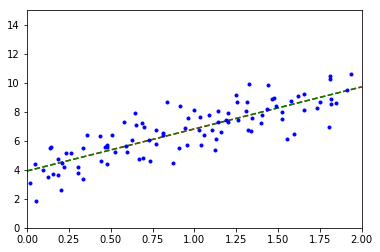

In [40]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X_new, lin_predict, "g--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# 勾配降下法

## バッチ勾配降下法

In [41]:
eta = 0.1
n_iterations = 10000
m = 100

theta = np.random.randn(2, 1)
theta

array([[1.36354296],
       [1.63237412]])

In [42]:
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.91922413],
       [2.90134597]])

## 確率的勾配降下法

In [44]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
theta

array([[ 0.68752845],
       [-0.29073466]])

In [48]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
#        print("random_index", random_index)
#        print("x_i", xi)
#        print("y_i", yi)
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
#        print("theta", theta)
        
theta

array([[3.90912231],
       [2.9533265 ]])

In [53]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print("intercept:", sgd_reg.intercept_)
print("coef:", sgd_reg.coef_)

intercept: [3.94318925]
coef: [2.9199931]


# 多項式回帰

In [54]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X

array([[-1.53664504],
       [-1.20127716],
       [-0.15811126],
       [-0.17124691],
       [ 2.05303475],
       [ 1.07492172],
       [-2.24967345],
       [-1.23412077],
       [-1.80924512],
       [ 2.08134214],
       [ 1.25500408],
       [ 1.69413915],
       [ 1.66879435],
       [-2.95651509],
       [ 0.03532303],
       [-0.27162461],
       [-0.45422404],
       [-2.22147401],
       [ 0.16594162],
       [-2.81057056],
       [-1.18366622],
       [ 1.3468245 ],
       [-1.93942799],
       [ 0.07359779],
       [ 2.32129267],
       [-0.31437185],
       [ 2.80072213],
       [-1.06334435],
       [-2.93084501],
       [-2.13323593],
       [-0.87887382],
       [-0.82872851],
       [-0.36573954],
       [-0.05716653],
       [ 2.60779441],
       [ 1.08838852],
       [-1.44435226],
       [ 2.70058483],
       [ 2.52390059],
       [ 1.05751007],
       [-0.09368869],
       [-0.62494514],
       [ 0.3955999 ],
       [ 0.2213418 ],
       [-0.10067509],
       [ 0

In [55]:
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
y

array([[ 2.54829642e+00],
       [ 1.06301946e+00],
       [ 1.79847931e+00],
       [ 1.95562187e+00],
       [ 7.04262326e+00],
       [ 4.68557863e+00],
       [ 1.39237263e+00],
       [ 2.03674897e+00],
       [ 2.41131206e+00],
       [ 6.14289653e+00],
       [ 4.91277471e+00],
       [ 4.92083184e+00],
       [ 4.71106141e+00],
       [ 4.02951333e+00],
       [ 1.71033021e+00],
       [ 1.17694407e+00],
       [ 3.16044834e+00],
       [ 1.96876806e+00],
       [ 3.33670873e+00],
       [ 3.41349151e+00],
       [ 2.43965894e+00],
       [ 4.20575378e+00],
       [ 1.90231784e+00],
       [ 2.23930358e+00],
       [ 6.51305929e+00],
       [ 1.50933230e+00],
       [ 9.83177953e+00],
       [ 1.32789348e+00],
       [ 2.78404352e+00],
       [ 2.19154574e+00],
       [ 1.36006723e-01],
       [ 1.30163355e+00],
       [ 2.82319038e+00],
       [ 1.87517158e+00],
       [ 8.31014226e+00],
       [ 3.61079280e+00],
       [ 1.47404500e+00],
       [ 8.62858776e+00],
       [ 8.2

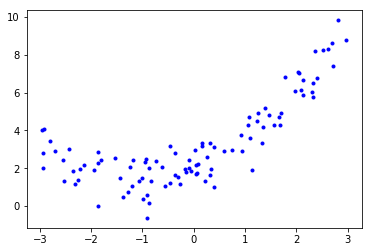

In [58]:
plt.plot(X, y, "b.")
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[-1.53664504e+00,  2.36127799e+00],
       [-1.20127716e+00,  1.44306682e+00],
       [-1.58111260e-01,  2.49991705e-02],
       [-1.71246912e-01,  2.93255048e-02],
       [ 2.05303475e+00,  4.21495167e+00],
       [ 1.07492172e+00,  1.15545670e+00],
       [-2.24967345e+00,  5.06103063e+00],
       [-1.23412077e+00,  1.52305407e+00],
       [-1.80924512e+00,  3.27336789e+00],
       [ 2.08134214e+00,  4.33198511e+00],
       [ 1.25500408e+00,  1.57503524e+00],
       [ 1.69413915e+00,  2.87010745e+00],
       [ 1.66879435e+00,  2.78487457e+00],
       [-2.95651509e+00,  8.74098147e+00],
       [ 3.53230329e-02,  1.24771666e-03],
       [-2.71624611e-01,  7.37799292e-02],
       [-4.54224036e-01,  2.06319475e-01],
       [-2.22147401e+00,  4.93494678e+00],
       [ 1.65941620e-01,  2.75366211e-02],
       [-2.81057056e+00,  7.89930686e+00],
       [-1.18366622e+00,  1.40106572e+00],
       [ 1.34682450e+00,  1.81393623e+00],
       [-1.93942799e+00,  3.76138091e+00],
       [ 7.

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04185369]), array([[1.05031067, 0.47364359]]))

# 学習曲線

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

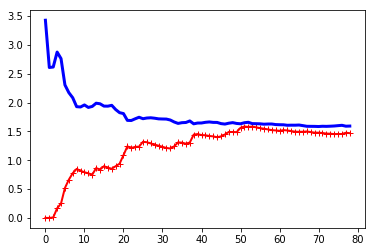

In [79]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

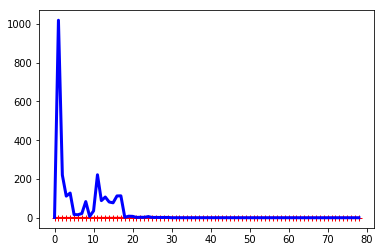

In [85]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# 正則化された線形回帰

## リッジ回帰

In [93]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.81902224]])

In [98]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.00075733])

## Lasso回帰

In [99]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.76765329])

In [100]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.97477945])

## Elastic Net

In [101]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.76820844])

## 早期打ち切り

In [111]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
print(minimum_val_error)
print(best_epoch)
print(best_model)

0.9093170677174163
39
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)


# ロジスティック回帰

In [112]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [113]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [114]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

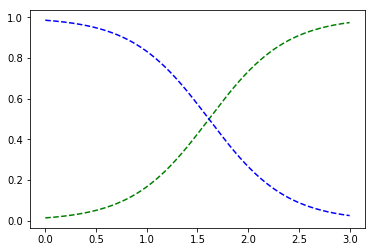

In [115]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [118]:
print(X)
print(y_proba)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

In [122]:
log_reg.predict([[1.7], [1.5], [2.0]])

array([1, 0, 1])

## ソフトマックス回帰

In [123]:
X = iris["data"][:, (2, 3)]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [124]:
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [131]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
softmax_reg.predict([[5, 2]])

array([2])

In [133]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])